## 2.Funnel Analysis: Find Conversion Rates

In [29]:
# Modules imported
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

In [2]:
users = pd.read_csv('/Users/paxton615/Github_Personal/Alibaba_UserBehavior_Analysis/drafts/users_2m.csv')
users.drop('Unnamed: 0', axis=1, inplace=True)
users.head()

,user_id,item_id,category_id,status,date,dayofweek,hour
0,309818,4710383,1792277,pv,2017-11-29,2,20
1,309818,1421743,4069500,pv,2017-11-29,2,20
2,309818,800137,1216617,pv,2017-11-29,2,20
3,309818,2493122,1216617,pv,2017-11-29,2,20
4,309818,1461532,3102419,pv,2017-11-30,3,7


##### UV 

In [3]:
'unique visitor number: {}'.format(users.user_id.nunique())

'unique visitor number: 29233'

##### PV

In [4]:
'page view number: {}'.format(users[users['status']=='pv']['user_id'].count())

'page view number: 2435888'

##### PV

In [5]:
avg_pv = users.groupby('status')['user_id'].count().pv / users.user_id.nunique()
'average pv for each user: {:.4}'.format(avg_pv)

'average pv for each user: 83.33'

##### PV Overview

In [8]:
user_pv = pd.DataFrame(users[users['status']=='pv'].groupby(users['user_id'],as_index=True)[['status']].count())
user_pv.columns=['pv']
user_pv.describe().T

,count,mean,std,min,25%,50%,75%,max
pv,29116.0,83.661492,72.299013,1.0,32.0,62.0,113.0,758.0


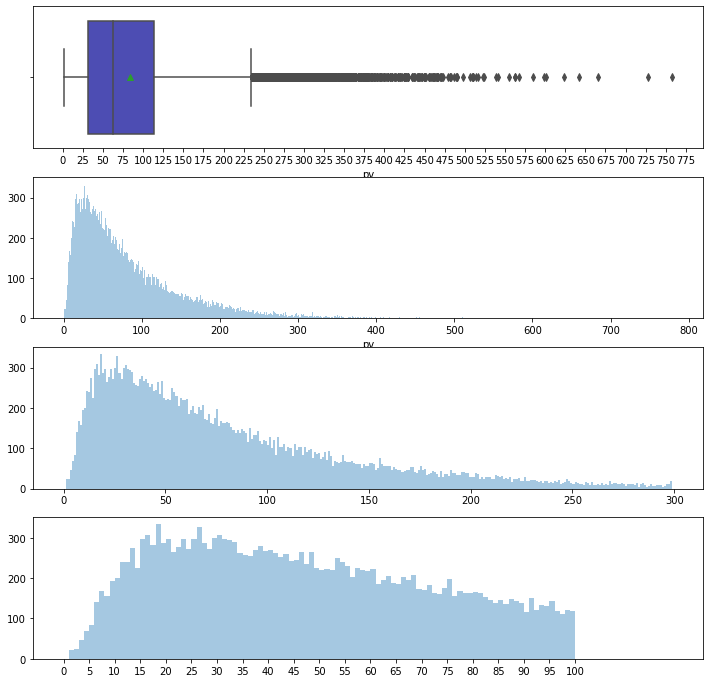

In [7]:
fig,ax = plt.subplots(nrows=4,figsize=(12,12))
sns.boxplot(user_pv['pv'],ax=ax[0],orient='h',showmeans=True,color='b',saturation=0.4)
sns.distplot(user_pv['pv'],bins=range(0,780,1),kde=False,ax=ax[1])
sns.distplot(user_pv[user_pv['pv']<300],bins=range(0,300,1),kde=False,ax=ax[2])
sns.distplot(user_pv[user_pv['pv']<100],bins=range(0,120,1),kde=False,ax=ax[3])
ax[0].set_xticks(range(0,800,25))
ax[3].set_xticks(range(0,105,5))
plt.show()

##### Bounce Rate

In [14]:
Bounce_rate = len(user_pv[user_pv['pv'] == 1]) / users[users['status']=='pv']['user_id'].count()
print('page view number: {}'.format(Bounce_rate))
print('Bounce rate is too small to be considered')

page view number: 9.44214183903365e-06
Bounce rate is too small to be considered


##### Funnel Analysis

In [26]:
print('number of pv: {}'.format(len(users[users['status']=='pv'])))

print('number of cart and fav: {}'.format(len(users[(users['status']=='cart') | (users['status']=='fav')])))

print('number of buy: {}'.format(len(users[users['status']=='buy'])))

number of pv: 2435888
number of cart and fav: 254541
number of buy: 58537


In [27]:
from pyecharts import options as opts
from pyecharts.charts import Funnel
from pyecharts.faker import Faker
from IPython.display import IFrame

x_data = ["pv=2435888", "cart&fav=254541(10.45% of pv)", "buy=58537(23% of cart&fav)"]
y_data = [2435888, 254541, 58537]

data = [[x_data[i], y_data[i]] for i in range(len(x_data))]

(
    Funnel(init_opts=opts.InitOpts(width="800px", height="600px"))
    .add(
        series_name="",
        data_pair=data,
        gap=2,
#         tooltip_opts=opts.TooltipOpts(trigger="item", formatter="{a} <br/>{b} : {c}%"),
        label_opts=opts.LabelOpts(is_show=True, position="outside",color='black'),
        itemstyle_opts=opts.ItemStyleOpts(border_color="#fff", border_width=1),
    )
    .set_global_opts(title_opts=opts.TitleOpts(title="Conversion Rate", subtitle="Alibaba_users"))
    .render("funnel_chart.html")
)
IFrame(src='./funnel_chart.html', width=1000, height=600)

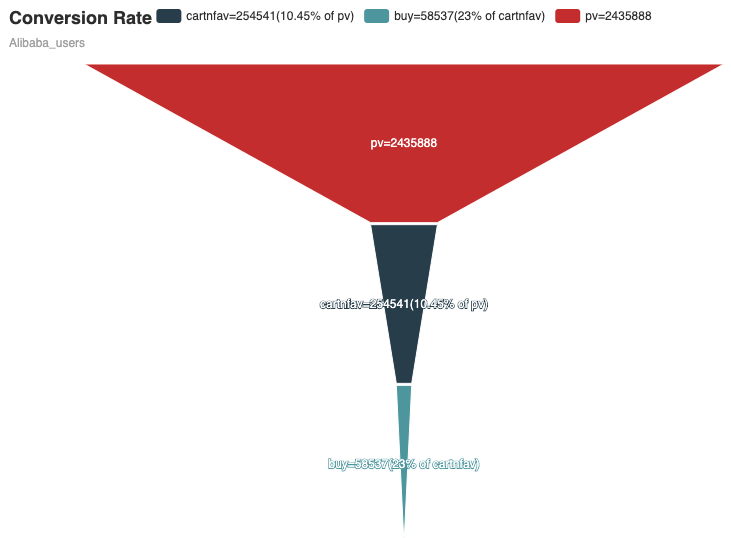

In [31]:
Image(filename='/Users/paxton615/Github_Personal/Alibaba_UserBehavior_Analysis/pics/funnel_chart.png')